In [ ]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [ ]:
# To upload kaggle .json file
!pip install kaggle
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nandakumarl","key":"8907c6fe1b7317b97d4b771f90240a7d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 105MB/s]


In [ ]:
!unzip nlp-getting-started.zip -d data

Archive:  nlp-getting-started.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [ ]:
import os
dir_name = "/content/data/"

In [ ]:
os.listdir(dir_name)

['test.csv', 'train.csv', 'sample_submission.csv']

##Exploratory Data analysis :

In [ ]:
# loading all datasets
df_train=pd.read_csv("/content/data/train.csv")
df_test=pd.read_csv("/content/data/test.csv")

In [ ]:
# Finding out the shape of each dataframes to get the intuition of problem
df_train.shape

(7613, 5)

In [ ]:
df_test.shape

(3263, 4)

# lets do some preprocessing and extract some features for building the model

In [ ]:
import re
import nltk
import string 
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.5/287.5 KB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.1/110.1 KB 17.1 MB/s eta 0:00:00


In [ ]:
import contractions

In [ ]:
def contractionfun(text):
  expanded_words=[]
  for word in text.split():
    expanded_words.append(contractions.fix(word))
  return '  '.join(expanded_words)

In [ ]:
def spacebetweenword(tweet):
    tweet = re.sub(r"IranDeal","Iran Deal", tweet)
    tweet = re.sub(r"ArianaGrande", "Ariana Grande", tweet)
    tweet = re.sub(r"camilacabello97", "camila cabello", tweet) 
    tweet = re.sub(r"RondaRousey", "Ronda Rousey", tweet)     
    tweet = re.sub(r"MTVHottest", "MTV Hottest", tweet)
    tweet = re.sub(r"TrapMusic", "Trap Music", tweet)
    tweet = re.sub(r"ProphetMuhammad", "Prophet Muhammad", tweet)
    tweet = re.sub(r"PantherAttack", "Panther Attack", tweet)
    tweet = re.sub(r"StrategicPatience", "Strategic Patience", tweet)
    tweet = re.sub(r"socialnews", "social news", tweet)
    tweet = re.sub(r"NASAHurricane", "NASA Hurricane", tweet)
    tweet = re.sub(r"onlinecommunities", "online communities", tweet)
    tweet = re.sub(r"humanconsumption", "human consumption", tweet)
    tweet = re.sub(r"Typhoon-Devastated", "Typhoon Devastated", tweet)
    tweet = re.sub(r"Meat-Loving", "Meat Loving", tweet)
    tweet = re.sub(r"facialabuse", "facial abuse", tweet)
    tweet = re.sub(r"LakeCounty", "Lake County", tweet)
    tweet = re.sub(r"BeingAuthor", "Being Author", tweet)
    tweet = re.sub(r"withheavenly", "with heavenly", tweet)
    tweet = re.sub(r"thankU", "thank you", tweet)
    tweet = re.sub(r"iTunesMusic", "iTunes Music", tweet)
    tweet = re.sub(r"OffensiveContent", "Offensive Content", tweet)
    tweet = re.sub(r"WorstSummerJob", "Worst Summer Job", tweet)
    tweet = re.sub(r"HarryBeCareful", "Harry Be Careful", tweet)
    tweet = re.sub(r"NASASolarSystem", "NASA Solar System", tweet)
    tweet = re.sub(r"animalrescue", "animal rescue", tweet)
    tweet = re.sub(r"KurtSchlichter", "Kurt Schlichter", tweet)
    tweet = re.sub(r"aRmageddon", "armageddon", tweet)
    tweet = re.sub(r"Throwingknifes", "Throwing knives", tweet)
    tweet = re.sub(r"GodsLove", "God's Love", tweet)
    tweet = re.sub(r"bookboost", "book boost", tweet)
    tweet = re.sub(r"ibooklove", "I book love", tweet)
    tweet = re.sub(r"NestleIndia", "Nestle India", tweet)
    tweet = re.sub(r"realDonaldTrump", "Donald Trump", tweet)
    tweet = re.sub(r"DavidVonderhaar", "David Vonderhaar", tweet)
    tweet = re.sub(r"CecilTheLion", "Cecil The Lion", tweet)
    tweet = re.sub(r"weathernetwork", "weather network", tweet)
    tweet = re.sub(r"withBioterrorism&use", "with Bioterrorism & use", tweet)
    tweet = re.sub(r"Hostage&2", "Hostage & 2", tweet)
    tweet = re.sub(r"GOPDebate", "GOP Debate", tweet)
    tweet = re.sub(r"RickPerry", "Rick Perry", tweet)
    tweet = re.sub(r"frontpage", "front page", tweet)
    tweet = re.sub(r"NewsInTweets", "News In Tweets", tweet)
    tweet = re.sub(r"ViralSpell", "Viral Spell", tweet)
    tweet = re.sub(r"til_now", "until now", tweet)
    tweet = re.sub(r"volcanoinRussia", "volcano in Russia", tweet)
    tweet = re.sub(r"ZippedNews", "Zipped News", tweet)
    tweet = re.sub(r"MicheleBachman", "Michele Bachman", tweet)
    tweet = re.sub(r"53inch", "53 inch", tweet)
    tweet = re.sub(r"KerrickTrial", "Kerrick Trial", tweet)
    tweet = re.sub(r"abstorm", "Alberta Storm", tweet)
    tweet = re.sub(r"Beyhive", "Beyonce hive", tweet)
    tweet = re.sub(r"IDFire", "Idaho Fire", tweet)
    tweet = re.sub(r"DETECTADO", "Detected", tweet)
    tweet = re.sub(r"RockyFire", "Rocky Fire", tweet)
    tweet = re.sub(r"Listen/Buy", "Listen / Buy", tweet)
    tweet = re.sub(r"NickCannon", "Nick Cannon", tweet)
    tweet = re.sub(r"FaroeIslands", "Faroe Islands", tweet)
    tweet = re.sub(r"yycstorm", "Calgary Storm", tweet)
    tweet = re.sub(r"IDPs:", "Internally Displaced People :", tweet)
    tweet = re.sub(r"ArtistsUnited", "Artists United", tweet)
    tweet = re.sub(r"ClaytonBryant", "Clayton Bryant", tweet)
    tweet = re.sub(r"jimmyfallon", "jimmy fallon", tweet)
    tweet = re.sub(r"justinbieber", "justin bieber", tweet)  
    tweet = re.sub(r"UTC2015", "UTC 2015", tweet)
    tweet = re.sub(r"Time2015", "Time 2015", tweet)
    tweet = re.sub(r"djicemoon", "dj icemoon", tweet)
    tweet = re.sub(r"LivingSafely", "Living Safely", tweet)
    tweet = re.sub(r"FIFA16", "Fifa 2016", tweet)
    tweet = re.sub(r"thisiswhywecanthavenicethings", "this is why we cannot have nice things", tweet)
    tweet = re.sub(r"bbcnews", "bbc news", tweet)
    tweet = re.sub(r"UndergroundRailraod", "Underground Railraod", tweet)
    tweet = re.sub(r"c4news", "c4 news", tweet)
    tweet = re.sub(r"OBLITERATION", "obliteration", tweet)
    tweet = re.sub(r"MUDSLIDE", "mudslide", tweet)
    tweet = re.sub(r"NoSurrender", "No Surrender", tweet)
    tweet = re.sub(r"NotExplained", "Not Explained", tweet)
    tweet = re.sub(r"greatbritishbakeoff", "great british bake off", tweet)
    tweet = re.sub(r"LondonFire", "London Fire", tweet)
    tweet = re.sub(r"KOTAWeather", "KOTA Weather", tweet)
    tweet = re.sub(r"LuchaUnderground", "Lucha Underground", tweet)
    tweet = re.sub(r"KOIN6News", "KOIN 6 News", tweet)
    tweet = re.sub(r"LiveOnK2", "Live On K2", tweet)
    tweet = re.sub(r"9NewsGoldCoast", "9 News Gold Coast", tweet)
    tweet = re.sub(r"nikeplus", "nike plus", tweet)
    tweet = re.sub(r"david_cameron", "David Cameron", tweet)
    tweet = re.sub(r"peterjukes", "Peter Jukes", tweet)
    tweet = re.sub(r"JamesMelville", "James Melville", tweet)
    tweet = re.sub(r"megynkelly", "Megyn Kelly", tweet)
    tweet = re.sub(r"cnewslive", "C News Live", tweet)
    tweet = re.sub(r"JamaicaObserver", "Jamaica Observer", tweet)
    tweet = re.sub(r"TweetLikeItsSeptember11th2001", "Tweet like it is september 11th 2001", tweet)
    tweet = re.sub(r"cbplawyers", "cbp lawyers", tweet)
    tweet = re.sub(r"fewmoretweets", "few more tweets", tweet)
    tweet = re.sub(r"BlackLivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"cjoyner", "Chris Joyner", tweet)
    tweet = re.sub(r"ENGvAUS", "England vs Australia", tweet)
    tweet = re.sub(r"ScottWalker", "Scott Walker", tweet)
    tweet = re.sub(r"MikeParrActor", "Michael Parr", tweet)
    tweet = re.sub(r"4PlayThursdays", "Foreplay Thursdays", tweet)
    tweet = re.sub(r"TGF2015", "Tontitown Grape Festival", tweet)
    tweet = re.sub(r"realmandyrain", "Mandy Rain", tweet)
    tweet = re.sub(r"GraysonDolan", "Grayson Dolan", tweet)
    tweet = re.sub(r"ApolloBrown", "Apollo Brown", tweet)
    tweet = re.sub(r"saddlebrooke", "Saddlebrooke", tweet)
    tweet = re.sub(r"TontitownGrape", "Tontitown Grape", tweet)
    tweet = re.sub(r"AbbsWinston", "Abbs Winston", tweet)
    tweet = re.sub(r"ShaunKing", "Shaun King", tweet)
    tweet = re.sub(r"MeekMill", "Meek Mill", tweet)
    tweet = re.sub(r"TornadoGiveaway", "Tornado Giveaway", tweet)
    tweet = re.sub(r"GRupdates", "GR updates", tweet)
    tweet = re.sub(r"SouthDowns", "South Downs", tweet)
    tweet = re.sub(r"braininjury", "brain injury", tweet)
    tweet = re.sub(r"auspol", "Australian politics", tweet)
    tweet = re.sub(r"PlannedParenthood", "Planned Parenthood", tweet)
    tweet = re.sub(r"calgaryweather", "Calgary Weather", tweet)
    tweet = re.sub(r"weallheartonedirection", "we all heart one direction", tweet)
    tweet = re.sub(r"edsheeran", "Ed Sheeran", tweet)
    tweet = re.sub(r"TrueHeroes", "True Heroes", tweet)
    tweet = re.sub(r"S3XLEAK", "sex leak", tweet)
    tweet = re.sub(r"ComplexMag", "Complex Magazine", tweet)
    tweet = re.sub(r"TheAdvocateMag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"CityofCalgary", "City of Calgary", tweet)
    tweet = re.sub(r"EbolaOutbreak", "Ebola Outbreak", tweet)
    tweet = re.sub(r"SummerFate", "Summer Fate", tweet)
    tweet = re.sub(r"RAmag", "Royal Academy Magazine", tweet)
    tweet = re.sub(r"offers2go", "offers to go", tweet)
    tweet = re.sub(r"foodscare", "food scare", tweet)
    tweet = re.sub(r"MNPDNashville", "Metropolitan Nashville Police Department", tweet)
    tweet = re.sub(r"TfLBusAlerts", "TfL Bus Alerts", tweet)
    tweet = re.sub(r"GamerGate", "Gamer Gate", tweet)
    tweet = re.sub(r"IHHen", "Humanitarian Relief", tweet)
    tweet = re.sub(r"spinningbot", "spinning bot", tweet)
    tweet = re.sub(r"ModiMinistry", "Modi Ministry", tweet)
    tweet = re.sub(r"TAXIWAYS", "taxi ways", tweet)
    tweet = re.sub(r"Calum5SOS", "Calum Hood", tweet)
    tweet = re.sub(r"po_st", "po.st", tweet)
    tweet = re.sub(r"scoopit", "scoop.it", tweet)
    tweet = re.sub(r"UltimaLucha", "Ultima Lucha", tweet)
    tweet = re.sub(r"JonathanFerrell", "Jonathan Ferrell", tweet)
    tweet = re.sub(r"aria_ahrary", "Aria Ahrary", tweet)
    tweet = re.sub(r"rapidcity", "Rapid City", tweet)
    tweet = re.sub(r"OutBid", "outbid", tweet)
    tweet = re.sub(r"lavenderpoetrycafe", "lavender poetry cafe", tweet)
    tweet = re.sub(r"EudryLantiqua", "Eudry Lantiqua", tweet)
    tweet = re.sub(r"15PM", "15 PM", tweet)
    tweet = re.sub(r"OriginalFunko", "Funko", tweet)
    tweet = re.sub(r"rightwaystan", "Richard Tan", tweet)
    tweet = re.sub(r"CindyNoonan", "Cindy Noonan", tweet)
    tweet = re.sub(r"RT_America", "RT America", tweet)
    tweet = re.sub(r"narendramodi", "Narendra Modi", tweet)
    tweet = re.sub(r"BakeOffFriends", "Bake Off Friends", tweet)
    tweet = re.sub(r"TeamHendrick", "Hendrick Motorsports", tweet)
    tweet = re.sub(r"alexbelloli", "Alex Belloli", tweet)
    tweet = re.sub(r"itsjustinstuart", "Justin Stuart", tweet)
    tweet = re.sub(r"gunsense", "gun sense", tweet)
    tweet = re.sub(r"DebateQuestionsWeWantToHear", "debate questions we want to hear", tweet)
    tweet = re.sub(r"RoyalCarribean", "Royal Carribean", tweet)
    tweet = re.sub(r"samanthaturne19", "Samantha Turner", tweet)
    tweet = re.sub(r"JonVoyage", "Jon Stewart", tweet)
    tweet = re.sub(r"renew911health", "renew 911 health", tweet)
    tweet = re.sub(r"SuryaRay", "Surya Ray", tweet)
    tweet = re.sub(r"pattonoswalt", "Patton Oswalt", tweet)
    tweet = re.sub(r"minhazmerchant", "Minhaz Merchant", tweet)
    tweet = re.sub(r"TLVFaces", "Israel Diaspora Coalition", tweet)
    tweet = re.sub(r"pmarca", "Marc Andreessen", tweet)
    tweet = re.sub(r"pdx911", "Portland Police", tweet)
    tweet = re.sub(r"jamaicaplain", "Jamaica Plain", tweet)
    tweet = re.sub(r"Japton", "Arkansas", tweet)
    tweet = re.sub(r"RouteComplex", "Route Complex", tweet)
    tweet = re.sub(r"INSubcontinent", "Indian Subcontinent", tweet)
    tweet = re.sub(r"NJTurnpike", "New Jersey Turnpike", tweet)
    tweet = re.sub(r"Politifiact", "PolitiFact", tweet)
    tweet = re.sub(r"Hiroshima70", "Hiroshima", tweet)
    tweet = re.sub(r"GMMBC", "Greater Mt Moriah Baptist Church", tweet)
    tweet = re.sub(r"versethe", "verse the", tweet)
    tweet = re.sub(r"TubeStrike", "Tube Strike", tweet)
    tweet = re.sub(r"MissionHills", "Mission Hills", tweet)
    tweet = re.sub(r"ProtectDenaliWolves", "Protect Denali Wolves", tweet)
    tweet = re.sub(r"NANKANA", "Nankana", tweet)
    tweet = re.sub(r"SAHIB", "Sahib", tweet)
    tweet = re.sub(r"PAKPATTAN", "Pakpattan", tweet)
    tweet = re.sub(r"Newz_Sacramento", "News Sacramento", tweet)
    tweet = re.sub(r"gofundme", "go fund me", tweet)
    tweet = re.sub(r"pmharper", "Stephen Harper", tweet)
    tweet = re.sub(r"IvanBerroa", "Ivan Berroa", tweet)
    tweet = re.sub(r"LosDelSonido", "Los Del Sonido", tweet)
    tweet = re.sub(r"bancodeseries", "banco de series", tweet)
    tweet = re.sub(r"timkaine", "Tim Kaine", tweet)
    tweet = re.sub(r"IdentityTheft", "Identity Theft", tweet)
    tweet = re.sub(r"AllLivesMatter", "All Lives Matter", tweet)
    tweet = re.sub(r"mishacollins", "Misha Collins", tweet)
    tweet = re.sub(r"BillNeelyNBC", "Bill Neely", tweet)
    tweet = re.sub(r"BeClearOnCancer", "be clear on cancer", tweet)
    tweet = re.sub(r"Kowing", "Knowing", tweet)
    tweet = re.sub(r"ScreamQueens", "Scream Queens", tweet)
    tweet = re.sub(r"AskCharley", "Ask Charley", tweet)
    tweet = re.sub(r"BlizzHeroes", "Heroes of the Storm", tweet)
    tweet = re.sub(r"BradleyBrad47", "Bradley Brad", tweet)
    tweet = re.sub(r"HannaPH", "Typhoon Hanna", tweet)
    tweet = re.sub(r"meinlcymbals", "MEINL Cymbals", tweet)
    tweet = re.sub(r"Ptbo", "Peterborough", tweet)
    tweet = re.sub(r"cnnbrk", "CNN Breaking News", tweet)
    tweet = re.sub(r"IndianNews", "Indian News", tweet)
    tweet = re.sub(r"savebees", "save bees", tweet)
    tweet = re.sub(r"GreenHarvard", "Green Harvard", tweet)
    tweet = re.sub(r"StandwithPP", "Stand with planned parent",tweet)
    tweet = re.sub(r"hermancranston", "Herman Cranston", tweet)
    tweet = re.sub(r"WMUR9", "WMUR-TV", tweet)
    tweet = re.sub(r"RockBottomRadFM", "Rock Bottom Radio", tweet)
    tweet = re.sub(r"ameenshaikh3", "Ameen Shaikh", tweet)
    tweet = re.sub(r"ProSyn", "Project Syndicate", tweet)
    tweet = re.sub(r"Daesh", "ISIS", tweet)
    tweet = re.sub(r"s2g", "swear to god", tweet)
    tweet = re.sub(r"listenlive", "listen live", tweet)
    tweet = re.sub(r"CDCgov", "Centers for Disease Control and Prevention", tweet)
    tweet = re.sub(r"FoxNew", "Fox News", tweet)
    tweet = re.sub(r"CBSBigBrother", "Big Brother", tweet)
    tweet = re.sub(r"JulieDiCaro", "Julie DiCaro", tweet)
    tweet = re.sub(r"theadvocatemag", "The Advocate Magazine", tweet)
    tweet = re.sub(r"RohnertParkDPS", "Rohnert Park Police Department", tweet)
    tweet = re.sub(r"THISIZBWRIGHT", "Bonnie Wright", tweet)
    tweet = re.sub(r"Popularmmos", "Popular MMOs", tweet)
    tweet = re.sub(r"WildHorses", "Wild Horses", tweet)
    tweet = re.sub(r"FantasticFour", "Fantastic Four", tweet)
    tweet = re.sub(r"HORNDALE", "Horndale", tweet)
    tweet = re.sub(r"PINER", "Piner", tweet)
    tweet = re.sub(r"BathAndNorthEastSomerset", "Bath and North East Somerset", tweet)
    tweet = re.sub(r"thatswhatfriendsarefor", "that is what friends are for", tweet)
    tweet = re.sub(r"residualincome", "residual income", tweet)
    tweet = re.sub(r"YahooNewsDigest", "Yahoo News Digest", tweet)
    tweet = re.sub(r"MalaysiaAirlines", "Malaysia Airlines", tweet)
    tweet = re.sub(r"AmazonDeals", "Amazon Deals", tweet)
    tweet = re.sub(r"MissCharleyWebb", "Charley Webb", tweet)
    tweet = re.sub(r"shoalstraffic", "shoals traffic", tweet)
    tweet = re.sub(r"GeorgeFoster72", "George Foster", tweet)
    tweet = re.sub(r"pop2015", "pop 2015", tweet)
    tweet = re.sub(r"_PokemonCards_", "Pokemon Cards", tweet)
    tweet = re.sub(r"DianneG", "Dianne Gallagher", tweet)
    tweet = re.sub(r"KashmirConflict", "Kashmir Conflict", tweet)
    tweet = re.sub(r"BritishBakeOff", "British Bake Off", tweet)
    tweet = re.sub(r"FreeKashmir", "Free Kashmir", tweet)
    tweet = re.sub(r"mattmosley", "Matt Mosley", tweet)
    tweet = re.sub(r"BishopFred", "Bishop Fred", tweet)
    tweet = re.sub(r"EndConflict", "End Conflict", tweet)
    tweet = re.sub(r"EndOccupation", "End Occupation", tweet)
    tweet = re.sub(r"UNHEALED", "unhealed", tweet)
    tweet = re.sub(r"CharlesDagnall", "Charles Dagnall", tweet)
    tweet = re.sub(r"Latestnews", "Latest news", tweet)
    tweet = re.sub(r"KindleCountdown", "Kindle Countdown", tweet)
    tweet = re.sub(r"NoMoreHandouts", "No More Handouts", tweet)
    tweet = re.sub(r"datingtips", "dating tips", tweet)
    tweet = re.sub(r"charlesadler", "Charles Adler", tweet)
    tweet = re.sub(r"twia", "Texas Windstorm Insurance Association", tweet)
    tweet = re.sub(r"txlege", "Texas Legislature", tweet)
    tweet = re.sub(r"WindstormInsurer", "Windstorm Insurer", tweet)
    tweet = re.sub(r"Newss", "News", tweet)
    tweet = re.sub(r"hempoil", "hemp oil", tweet)
    tweet = re.sub(r"CommoditiesAre", "Commodities are", tweet)
    tweet = re.sub(r"tubestrike", "tube strike", tweet)
    tweet = re.sub(r"JoeNBC", "Joe Scarborough", tweet)
    tweet = re.sub(r"LiteraryCakes", "Literary Cakes", tweet)
    tweet = re.sub(r"TI5", "The International 5", tweet)
    tweet = re.sub(r"thehill", "the hill", tweet)
    tweet = re.sub(r"3others", "3 others", tweet)
    tweet = re.sub(r"stighefootball", "Sam Tighe", tweet)
    tweet = re.sub(r"whatstheimportantvideo", "what is the important video", tweet)
    tweet = re.sub(r"ClaudioMeloni", "Claudio Meloni", tweet)
    tweet = re.sub(r"DukeSkywalker", "Duke Skywalker", tweet)
    tweet = re.sub(r"carsonmwr", "Fort Carson", tweet)
    tweet = re.sub(r"offdishduty", "off dish duty", tweet)
    tweet = re.sub(r"andword", "and word", tweet)
    tweet = re.sub(r"rhodeisland", "Rhode Island", tweet)
    tweet = re.sub(r"easternoregon", "Eastern Oregon", tweet)
    tweet = re.sub(r"WAwildfire", "Washington Wildfire", tweet)
    tweet = re.sub(r"fingerrockfire", "Finger Rock Fire", tweet)
    tweet = re.sub(r"57am", "57 am", tweet)
    tweet = re.sub(r"JacobHoggard", "Jacob Hoggard", tweet)
    tweet = re.sub(r"newnewnew", "new new new", tweet)
    tweet = re.sub(r"under50", "under 50", tweet)
    tweet = re.sub(r"getitbeforeitsgone", "get it before it is gone", tweet)
    tweet = re.sub(r"freshoutofthebox", "fresh out of the box", tweet)
    tweet = re.sub(r"amwriting", "am writing", tweet)
    tweet = re.sub(r"Bokoharm", "Boko Haram", tweet)
    tweet = re.sub(r"Nowlike", "Now like", tweet)
    tweet = re.sub(r"seasonfrom", "season from", tweet)
    tweet = re.sub(r"epicente", "epicenter", tweet)
    tweet = re.sub(r"epicenterr", "epicenter", tweet)
    tweet = re.sub(r"sicklife", "sick life", tweet)
    tweet = re.sub(r"yycweather", "Calgary Weather", tweet)
    tweet = re.sub(r"calgarysun", "Calgary Sun", tweet)
    tweet = re.sub(r"approachng", "approaching", tweet)
    tweet = re.sub(r"evng", "evening", tweet)
    tweet = re.sub(r"Sumthng", "something", tweet)
    tweet = re.sub(r"EllenPompeo", "Ellen Pompeo", tweet)
    tweet = re.sub(r"shondarhimes", "Shonda Rhimes", tweet)
    tweet = re.sub(r"ABCNetwork", "ABC Network", tweet)
    tweet = re.sub(r"SushmaSwaraj", "Sushma Swaraj", tweet)
    tweet = re.sub(r"pray4japan", "Pray for Japan", tweet)
    tweet = re.sub(r"hope4japan", "Hope for Japan", tweet)
    tweet = re.sub(r"Illusionimagess", "Illusion images", tweet)
    tweet = re.sub(r"SummerUnderTheStars", "Summer Under The Stars", tweet)
    tweet = re.sub(r"ShallWeDance", "Shall We Dance", tweet)
    tweet = re.sub(r"TCMParty", "TCM Party", tweet)
    tweet = re.sub(r"marijuananews", "marijuana news", tweet)
    tweet = re.sub(r"onbeingwithKristaTippett", "on being with Krista Tippett", tweet)
    tweet = re.sub(r"Beingtweets", "Being tweets", tweet)
    tweet = re.sub(r"newauthors", "new authors", tweet)
    tweet = re.sub(r"remedyyyy", "remedy", tweet)
    tweet = re.sub(r"44PM", "44 PM", tweet)
    tweet = re.sub(r"HeadlinesApp", "Headlines App", tweet)
    tweet = re.sub(r"40PM", "40 PM", tweet)
    tweet = re.sub(r"myswc", "Severe Weather Center", tweet)
    tweet = re.sub(r"ithats", "that is", tweet)
    tweet = re.sub(r"icouldsitinthismomentforever", "I could sit in this moment forever", tweet)
    tweet = re.sub(r"FatLoss", "Fat Loss", tweet)
    tweet = re.sub(r"02PM", "02 PM", tweet)
    tweet = re.sub(r"MetroFmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"Bstrd", "bastard", tweet)
    tweet = re.sub(r"bldy", "bloody", tweet)
    tweet = re.sub(r"MetrofmTalk", "Metro Fm Talk", tweet)
    tweet = re.sub(r"terrorismturn", "terrorism turn", tweet)
    tweet = re.sub(r"BBCNewsAsia", "BBC News Asia", tweet)
    tweet = re.sub(r"BehindTheScenes", "Behind The Scenes", tweet)
    tweet = re.sub(r"GeorgeTakei", "George Takei", tweet)
    tweet = re.sub(r"WomensWeeklyMag", "Womens Weekly Magazine", tweet)
    tweet = re.sub(r"SurvivorsGuidetoEarth", "Survivors Guide to Earth", tweet)
    tweet = re.sub(r"incubusband", "incubus band", tweet)
    tweet = re.sub(r"Babypicturethis", "Baby picture this", tweet)
    tweet = re.sub(r"BombEffects", "Bomb Effects", tweet)
    tweet = re.sub(r"win10", "Windows 10", tweet)
    tweet = re.sub(r"idkidk", "I do not know I do not know", tweet)
    tweet = re.sub(r"TheWalkingDead", "The Walking Dead", tweet)
    tweet = re.sub(r"amyschumer", "Amy Schumer", tweet)
    tweet = re.sub(r"crewlist", "crew list", tweet)
    tweet = re.sub(r"Erdogans", "Erdogan", tweet)
    tweet = re.sub(r"BBCLive", "BBC Live", tweet)
    tweet = re.sub(r"TonyAbbottMHR", "Tony Abbott", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"paulmyerscough", "Paul Myerscough", tweet)
    tweet = re.sub(r"georgegallagher", "George Gallagher", tweet)
    tweet = re.sub(r"JimmieJohnson", "Jimmie Johnson", tweet)
    tweet = re.sub(r"pctool", "pc tool", tweet)
    tweet = re.sub(r"DoingHashtagsRight", "Doing Hashtags Right", tweet)
    tweet = re.sub(r"ThrowbackThursday", "Throwback Thursday", tweet)
    tweet = re.sub(r"SnowBackSunday", "Snowback Sunday", tweet)
    tweet = re.sub(r"LakeEffect", "Lake Effect", tweet)
    tweet = re.sub(r"RTphotographyUK", "Richard Thomas Photography UK", tweet)
    tweet = re.sub(r"BigBang_CBS", "Big Bang CBS", tweet)
    tweet = re.sub(r"writerslife", "writers life", tweet)
    tweet = re.sub(r"NaturalBirth", "Natural Birth", tweet)
    tweet = re.sub(r"UnusualWords", "Unusual Words", tweet)
    tweet = re.sub(r"wizkhalifa", "Wiz Khalifa", tweet)
    tweet = re.sub(r"acreativedc", "a creative DC", tweet)
    tweet = re.sub(r"SyrianRefugees", "Syrian Refugees", tweet)
    tweet = re.sub(r"changetheworld", "change the world", tweet)
    tweet = re.sub(r"Ebolacase", "Ebola case", tweet)
    tweet = re.sub(r"mcgtech", "mcg technologies", tweet)
    tweet = re.sub(r"withweapons", "with weapons", tweet)
    tweet = re.sub(r"advancedwarfare", "advanced warfare", tweet)
    tweet = re.sub(r"letsFootball", "let us Football", tweet)
    tweet = re.sub(r"LateNiteMix", "late night mix", tweet)
    tweet = re.sub(r"PhilCollinsFeed", "Phil Collins", tweet)
    tweet = re.sub(r"RudyHavenstein", "Rudy Havenstein", tweet)
    tweet = re.sub(r"22PM", "22 PM", tweet)
    tweet = re.sub(r"54am", "54 AM", tweet)
    tweet = re.sub(r"38am", "38 AM", tweet)
    tweet = re.sub(r"OldFolkExplainStuff", "Old Folk Explain Stuff", tweet)
    tweet = re.sub(r"BlacklivesMatter", "Black Lives Matter", tweet)
    tweet = re.sub(r"InsaneLimits", "Insane Limits", tweet)
    tweet = re.sub(r"youcantsitwithus", "you cannot sit with us", tweet)
    tweet = re.sub(r"2k15", "2015", tweet)
    tweet = re.sub(r"TheIran", "Iran", tweet)
    tweet = re.sub(r"JimmyFallon", "Jimmy Fallon", tweet)
    tweet = re.sub(r"AlbertBrooks", "Albert Brooks", tweet)
    tweet = re.sub(r"defense_news", "defense news", tweet)
    tweet = re.sub(r"nuclearrcSA", "Nuclear Risk Control Self Assessment", tweet)
    tweet = re.sub(r"Auspol", "Australia Politics", tweet)
    tweet = re.sub(r"NuclearPower", "Nuclear Power", tweet)
    tweet = re.sub(r"WhiteTerrorism", "White Terrorism", tweet)
    tweet = re.sub(r"truthfrequencyradio", "Truth Frequency Radio", tweet)
    tweet = re.sub(r"ErasureIsNotEquality", "Erasure is not equality", tweet)
    tweet = re.sub(r"ProBonoNews", "Pro Bono News", tweet)
    tweet = re.sub(r"JakartaPost", "Jakarta Post", tweet)
    tweet = re.sub(r"toopainful", "too painful", tweet)
    tweet = re.sub(r"melindahaunton", "Melinda Haunton", tweet)
    tweet = re.sub(r"NoNukes", "No Nukes", tweet)
    tweet = re.sub(r"curryspcworld", "Currys PC World", tweet)
    tweet = re.sub(r"ineedcake", "I need cake", tweet)
    tweet = re.sub(r"blackforestgateau", "black forest gateau", tweet)
    tweet = re.sub(r"BBCOne", "BBC One", tweet)
    tweet = re.sub(r"AlexxPage", "Alex Page", tweet)
    tweet = re.sub(r"jonathanserrie", "Jonathan Serrie", tweet)
    tweet = re.sub(r"SocialJerkBlog", "Social Jerk Blog", tweet)
    tweet = re.sub(r"ChelseaVPeretti", "Chelsea Peretti", tweet)
    tweet = re.sub(r"irongiant", "iron giant", tweet)
    tweet = re.sub(r"RonFunches", "Ron Funches", tweet)
    tweet = re.sub(r"TimCook", "Tim Cook", tweet)
    tweet = re.sub(r"sebastianstanisaliveandwell", "Sebastian Stan is alive and well", tweet)
    tweet = re.sub(r"Madsummer", "Mad summer", tweet)
    tweet = re.sub(r"NowYouKnow", "Now you know", tweet)
    tweet = re.sub(r"concertphotography", "concert photography", tweet)
    tweet = re.sub(r"TomLandry", "Tom Landry", tweet)
    tweet = re.sub(r"showgirldayoff", "show girl day off", tweet)
    tweet = re.sub(r"Yougslavia", "Yugoslavia", tweet)
    tweet = re.sub(r"QuantumDataInformatics", "Quantum Data Informatics", tweet)
    tweet = re.sub(r"FromTheDesk", "From The Desk", tweet)
    tweet = re.sub(r"TheaterTrial", "Theater Trial", tweet)
    tweet = re.sub(r"CatoInstitute", "Cato Institute", tweet)
    tweet = re.sub(r"EmekaGift", "Emeka Gift", tweet)
    tweet = re.sub(r"LetsBe_Rational", "Let us be rational", tweet)
    tweet = re.sub(r"Cynicalreality", "Cynical reality", tweet)
    tweet = re.sub(r"FredOlsenCruise", "Fred Olsen Cruise", tweet)
    tweet = re.sub(r"NotSorry", "not sorry", tweet)
    tweet = re.sub(r"UseYourWords", "use your words", tweet)
    tweet = re.sub(r"WordoftheDay", "word of the day", tweet)
    tweet = re.sub(r"Dictionarycom", "Dictionary.com", tweet)
    tweet = re.sub(r"TheBrooklynLife", "The Brooklyn Life", tweet)
    tweet = re.sub(r"jokethey", "joke they", tweet)
    tweet = re.sub(r"nflweek1picks", "NFL week 1 picks", tweet)
    tweet = re.sub(r"uiseful", "useful", tweet)
    tweet = re.sub(r"JusticeDotOrg", "The American Association for Justice", tweet)
    tweet = re.sub(r"autoaccidents", "auto accidents", tweet)
    tweet = re.sub(r"SteveGursten", "Steve Gursten", tweet)
    tweet = re.sub(r"MichiganAutoLaw", "Michigan Auto Law", tweet)
    tweet = re.sub(r"birdgang", "bird gang", tweet)
    tweet = re.sub(r"nflnetwork", "NFL Network", tweet)
    tweet = re.sub(r"NYDNSports", "NY Daily News Sports", tweet)
    tweet = re.sub(r"RVacchianoNYDN", "Ralph Vacchiano NY Daily News", tweet)
    tweet = re.sub(r"EdmontonEsks", "Edmonton Eskimos", tweet)
    tweet = re.sub(r"david_brelsford", "David Brelsford", tweet)
    tweet = re.sub(r"TOI_India", "The Times of India", tweet)
    tweet = re.sub(r"hegot", "he got", tweet)
    tweet = re.sub(r"SkinsOn9", "Skins on 9", tweet)
    tweet = re.sub(r"sothathappened", "so that happened", tweet)
    tweet = re.sub(r"LCOutOfDoors", "LC Out Of Doors", tweet)
    tweet = re.sub(r"NationFirst", "Nation First", tweet)
    tweet = re.sub(r"IndiaToday", "India Today", tweet)
    tweet = re.sub(r"HLPS", "helps", tweet)
    tweet = re.sub(r"HOSTAGESTHROSW", "hostages throw", tweet)
    tweet = re.sub(r"SNCTIONS", "sanctions", tweet)
    tweet = re.sub(r"BidTime", "Bid Time", tweet)
    tweet = re.sub(r"crunchysensible", "crunchy sensible", tweet)
    tweet = re.sub(r"RandomActsOfRomance", "Random acts of romance", tweet)
    tweet = re.sub(r"MomentsAtHill", "Moments at hill", tweet)
    tweet = re.sub(r"eatshit", "eat shit", tweet)
    tweet = re.sub(r"liveleakfun", "live leak fun", tweet)
    tweet = re.sub(r"SahelNews", "Sahel News", tweet)
    tweet = re.sub(r"abc7newsbayarea", "ABC 7 News Bay Area", tweet)
    tweet = re.sub(r"facilitiesmanagement", "facilities management", tweet)
    tweet = re.sub(r"facilitydude", "facility dude", tweet)
    tweet = re.sub(r"CampLogistics", "Camp logistics", tweet)
    tweet = re.sub(r"alaskapublic", "Alaska public", tweet)
    tweet = re.sub(r"MarketResearch", "Market Research", tweet)
    tweet = re.sub(r"AccuracyEsports", "Accuracy Esports", tweet)
    tweet = re.sub(r"TheBodyShopAust", "The Body Shop Australia", tweet)
    tweet = re.sub(r"yychail", "Calgary hail", tweet)
    tweet = re.sub(r"yyctraffic", "Calgary traffic", tweet)
    tweet = re.sub(r"eliotschool", "eliot school", tweet)
    tweet = re.sub(r"TheBrokenCity", "The Broken City", tweet)
    tweet = re.sub(r"OldsFireDept", "Olds Fire Department", tweet)
    tweet = re.sub(r"RiverComplex", "River Complex", tweet)
    tweet = re.sub(r"fieldworksmells", "field work smells", tweet)
    tweet = re.sub(r"IranElection", "Iran Election", tweet)
    tweet = re.sub(r"glowng", "glowing", tweet)
    tweet = re.sub(r"kindlng", "kindling", tweet)
    tweet = re.sub(r"riggd", "rigged", tweet)
    tweet = re.sub(r"slownewsday", "slow news day", tweet)
    tweet = re.sub(r"MyanmarFlood", "Myanmar Flood", tweet)
    tweet = re.sub(r"abc7chicago", "ABC 7 Chicago", tweet)
    tweet = re.sub(r"copolitics", "Colorado Politics", tweet)
    tweet = re.sub(r"AdilGhumro", "Adil Ghumro", tweet)
    tweet = re.sub(r"netbots", "net bots", tweet)
    tweet = re.sub(r"byebyeroad", "bye bye road", tweet)
    tweet = re.sub(r"massiveflooding", "massive flooding", tweet)
    tweet = re.sub(r"EndofUS", "End of United States", tweet)
    tweet = re.sub(r"35PM", "35 PM", tweet)
    tweet = re.sub(r"greektheatrela", "Greek Theatre Los Angeles", tweet)
    tweet = re.sub(r"76mins", "76 minutes", tweet)
    tweet = re.sub(r"publicsafetyfirst", "public safety first", tweet)
    tweet = re.sub(r"livesmatter", "lives matter", tweet)
    tweet = re.sub(r"myhometown", "my hometown", tweet)
    tweet = re.sub(r"tankerfire", "tanker fire", tweet)
    tweet = re.sub(r"MEMORIALDAY", "memorial day", tweet)
    tweet = re.sub(r"MEMORIAL_DAY", "memorial day", tweet)
    tweet = re.sub(r"instaxbooty", "instagram booty", tweet)
    tweet = re.sub(r"Jerusalem_Post", "Jerusalem Post", tweet)
    tweet = re.sub(r"WayneRooney_INA", "Wayne Rooney", tweet)
    tweet = re.sub(r"VirtualReality", "Virtual Reality", tweet)
    tweet = re.sub(r"OculusRift", "Oculus Rift", tweet)
    tweet = re.sub(r"OwenJones84", "Owen Jones", tweet)
    tweet = re.sub(r"jeremycorbyn", "Jeremy Corbyn", tweet)
    tweet = re.sub(r"paulrogers002", "Paul Rogers", tweet)
    tweet = re.sub(r"mortalkombatx", "Mortal Kombat X", tweet)
    tweet = re.sub(r"mortalkombat", "Mortal Kombat", tweet)
    tweet = re.sub(r"FilipeCoelho92", "Filipe Coelho", tweet)
    tweet = re.sub(r"OnlyQuakeNews", "Only Quake News", tweet)
    tweet = re.sub(r"kostumes", "costumes", tweet)
    tweet = re.sub(r"YEEESSSS", "yes", tweet)
    tweet = re.sub(r"ToshikazuKatayama", "Toshikazu Katayama", tweet)
    tweet = re.sub(r"IntlDevelopment", "Intl Development", tweet)
    tweet = re.sub(r"ExtremeWeather", "Extreme Weather", tweet)
    tweet = re.sub(r"WereNotGruberVoters", "We are not gruber voters", tweet)
    tweet = re.sub(r"NewsThousands", "News Thousands", tweet)
    tweet = re.sub(r"EdmundAdamus", "Edmund Adamus", tweet)
    tweet = re.sub(r"EyewitnessWV", "Eye witness WV", tweet)
    tweet = re.sub(r"PhiladelphiaMuseu", "Philadelphia Museum", tweet)
    tweet = re.sub(r"DublinComicCon", "Dublin Comic Con", tweet)
    tweet = re.sub(r"NicholasBrendon", "Nicholas Brendon", tweet)
    tweet = re.sub(r"Alltheway80s", "All the way 80s", tweet)
    tweet = re.sub(r"FromTheField", "From the field", tweet)
    tweet = re.sub(r"NorthIowa", "North Iowa", tweet)
    tweet = re.sub(r"WillowFire", "Willow Fire", tweet)
    tweet = re.sub(r"MadRiverComplex", "Mad River Complex", tweet)
    tweet = re.sub(r"feelingmanly", "feeling manly", tweet)
    tweet = re.sub(r"stillnotoverit", "still not over it", tweet)
    tweet = re.sub(r"FortitudeValley", "Fortitude Valley", tweet)
    tweet = re.sub(r"CoastpowerlineTramTr", "Coast powerline", tweet)
    tweet = re.sub(r"ServicesGold", "Services Gold", tweet)
    tweet = re.sub(r"NewsbrokenEmergency", "News broken emergency", tweet)
    tweet = re.sub(r"Evaucation", "evacuation", tweet)
    tweet = re.sub(r"leaveevacuateexitbe", "leave evacuate exit be", tweet)
    tweet = re.sub(r"P_EOPLE", "PEOPLE", tweet)
    tweet = re.sub(r"Tubestrike", "tube strike", tweet)
    tweet = re.sub(r"CLASS_SICK", "CLASS SICK", tweet)
    tweet = re.sub(r"localplumber", "local plumber", tweet)
    tweet = re.sub(r"awesomejobsiri", "awesome job siri", tweet)
    tweet = re.sub(r"PayForItHow", "Pay for it how", tweet)
    tweet = re.sub(r"ThisIsAfrica", "This is Africa", tweet)
    tweet = re.sub(r"crimeairnetwork", "crime air network", tweet)
    tweet = re.sub(r"KimAcheson", "Kim Acheson", tweet)
    tweet = re.sub(r"cityofcalgary", "City of Calgary", tweet)
    tweet = re.sub(r"prosyndicate", "pro syndicate", tweet)
    tweet = re.sub(r"660NEWS", "660 NEWS", tweet)
    tweet = re.sub(r"BusInsMagazine", "Business Insurance Magazine", tweet)
    tweet = re.sub(r"wfocus", "focus", tweet)
    tweet = re.sub(r"ShastaDam", "Shasta Dam", tweet)
    tweet = re.sub(r"go2MarkFranco", "Mark Franco", tweet)
    tweet = re.sub(r"StephGHinojosa", "Steph Hinojosa", tweet)
    tweet = re.sub(r"Nashgrier", "Nash Grier", tweet)
    tweet = re.sub(r"NashNewVideo", "Nash new video", tweet)
    tweet = re.sub(r"IWouldntGetElectedBecause", "I would not get elected because", tweet)
    tweet = re.sub(r"SHGames", "Sledgehammer Games", tweet)
    tweet = re.sub(r"bedhair", "bed hair", tweet)
    tweet = re.sub(r"JoelHeyman", "Joel Heyman", tweet)
    tweet = re.sub(r"viaYouTube", "via YouTube", tweet)
    return tweet

In [ ]:
# Function for removing urls
#https://stackoverflow.com/questions/11331982/how-to-remove-any-url-within-a-string-in-python
#https://regex101.com/r/rP6sA9/1/debugger used to test our regular expression
def url_remover(text):
    url_patterns = re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
    return url_patterns

In [ ]:
# Starts with basic preprocessing steps
#https://www.analyticsvidhya.com/blog/2021/06/text-preprocessing-in-nlp-with-python-codes/
from nltk.stem import WordNetLemmatizer
wl = WordNetLemmatizer()
def preprocessing(text,remove_emojis=True):
  tweets = []
  for sentence in tqdm(text):
    #sentence = spacebetweenword(sentence)
    sentence = sentence.lower() # converting the words to lower case
    sentence =  url_remover(sentence) # removing the url from the sentence
    sentence = re.sub(r'@w+',  '', sentence).strip() # removing the words starts with "@"
    sentence = contractionfun(sentence)
    sentence = re.sub("[^a-zA-Z0-9 ']", " ", sentence) # removing symbols
    sentence = sentence.replace("'","")
    if remove_emojis:
      sentence = sentence.encode('ascii', 'ignore').decode('utf8').strip()
    sentence = sentence.split()
    sentence1 = [wl.lemmatize(word) for word in sentence if word not in set(stopwords.words("english"))] #lemmatization and stopwords removal from tweets
    sentence1 = " ".join(sentence1)
    tweets.append(sentence1)
  return tweets
tweets = preprocessing(df_train['text'])

100%|██████████| 7613/7613 [00:14<00:00, 529.77it/s]


In [ ]:
df_train['text'][400]

'Owner of Chicago-Area Gay Bar Admits to Arson Scheme http://t.co/0TSlQjOKvh via @theadvocatemag #LGBT'

In [ ]:
tweets[400]

'owner chicago area gay bar admits arson scheme via theadvocatemag lgbt'

In [ ]:
df_train["clean_text"]=pd.DataFrame(tweets)

In [ ]:
# Since Keyword and location has more number of unique words and NAN Value so neglected as of now. First try to build using TEXT column only. If required will use keyword and location column data
x=pd.DataFrame(tweets)
y=df_train["target"]

In [ ]:
x

,0
0,deed reason earthquake may allah forgive u
1,forest fire near la ronge sask canada
2,resident asked shelter place notified officer ...
3,13 000 people receive wildfire evacuation orde...
4,got sent photo ruby alaska smoke wildfire pour...
...,...
7608,two giant crane holding bridge collapse nearby...
7609,aria ahrary thetawniest control wild fire cali...
7610,m1 94 01 04 utc 5km volcano hawaii
7611,police investigating e bike collided car littl...


In [ ]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7608    1
7609    1
7610    1
7611    1
7612    1
Name: target, Length: 7613, dtype: int64

In [ ]:
tweets_test = preprocessing(df_test['text'])

100%|██████████| 3263/3263 [00:05<00:00, 620.04it/s]


In [ ]:
x_test =pd.DataFrame(tweets_test)

#lets try to add meta features and check the F1 score

In [ ]:
#https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc/notebook

The meta features used for the analysis are;

*   **word_count** number of words in text
*   **unique_word_count** number of unique words in text
*   **stop_word_count** number of stop words in text
*   **mean_word_length** average character count in words
*   **char_count** number of characters in text
*   **punctuation_count** number of punctuations in text



In [ ]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words("english")]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in stopwords.words("english")]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))


In [ ]:
df_train.columns

Index(['id', 'keyword', 'location', 'text', 'target', 'clean_text',
       'word_count', 'unique_word_count', 'stop_word_count',
       'mean_word_length', 'char_count', 'punctuation_count'],
      dtype='object')

In [ ]:
X_train_meta =df_train[["word_count","unique_word_count","stop_word_count","mean_word_length","char_count","punctuation_count"]]

In [ ]:
X_train_meta

,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count
0,13,13,6,4.384615,69,1
1,7,7,0,4.571429,38,1
2,22,20,11,5.090909,133,3
3,8,8,1,7.125000,65,2
4,16,15,7,4.500000,88,2
...,...,...,...,...,...,...
7608,11,11,2,6.636364,83,5
7609,20,17,9,5.300000,125,5
7610,8,8,2,7.250000,65,11
7611,19,19,5,6.263158,137,5


In [ ]:
x_updated=df_train.drop(['id','keyword','location','text','target'],axis=1)

In [ ]:
x_updated

,clean_text,word_count,unique_word_count,stop_word_count,mean_word_length,char_count,punctuation_count
0,deed reason earthquake may allah forgive u,13,13,6,4.384615,69,1
1,forest fire near la ronge sask canada,7,7,0,4.571429,38,1
2,resident asked shelter place notified officer ...,22,20,11,5.090909,133,3
3,13 000 people receive wildfire evacuation orde...,8,8,1,7.125000,65,2
4,got sent photo ruby alaska smoke wildfire pour...,16,15,7,4.500000,88,2
...,...,...,...,...,...,...,...
7608,two giant crane holding bridge collapse nearby...,11,11,2,6.636364,83,5
7609,aria ahrary thetawniest control wild fire cali...,20,17,9,5.300000,125,5
7610,m1 94 01 04 utc 5km volcano hawaii,8,8,2,7.250000,65,11
7611,police investigating e bike collided car littl...,19,19,5,6.263158,137,5


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_updated, y, test_size=0.33, stratify=y) 

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown --id 1LIcc8FOV4CePFci_a6iNdtJoKaSw09uf


/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1LIcc8FOV4CePFci_a6iNdtJoKaSw09uf
To: /content/glove_vectors
100% 128M/128M [00:00<00:00, 134MB/s]


In [ ]:
from scipy.sparse import hstack
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [ ]:
scaler.fit(X_train['word_count'].values.reshape(-1,1))
X_train_count_words=scaler.transform(X_train['word_count'].values.reshape(-1,1))
X_test_count_words=scaler.transform(X_test['word_count'].values.reshape(-1,1))

scaler.fit(X_train['unique_word_count'].values.reshape(-1,1))
X_train_uniq_words=scaler.transform(X_train['unique_word_count'].values.reshape(-1,1))
X_test_uniq_words=scaler.transform(X_test['unique_word_count'].values.reshape(-1,1))


scaler.fit(X_train['stop_word_count'].values.reshape(-1,1))
X_train_stp_words=scaler.transform(X_train['stop_word_count'].values.reshape(-1,1))
X_test_stp_words=scaler.transform(X_test['stop_word_count'].values.reshape(-1,1))


scaler.fit(X_train['mean_word_length'].values.reshape(-1,1))
X_train_mean_words=scaler.transform(X_train['mean_word_length'].values.reshape(-1,1))
X_test_mean_words=scaler.transform(X_test['mean_word_length'].values.reshape(-1,1))


scaler.fit(X_train['char_count'].values.reshape(-1,1))
X_train_count_char=scaler.transform(X_train['char_count'].values.reshape(-1,1))
X_test_count_char=scaler.transform(X_test['char_count'].values.reshape(-1,1))


scaler.fit(X_train['punctuation_count'].values.reshape(-1,1))
X_train_count_punc=scaler.transform(X_train['punctuation_count'].values.reshape(-1,1))
X_test_count_punc=scaler.transform(X_test['punctuation_count'].values.reshape(-1,1))

In [ ]:
X_train_numeric_features = np.concatenate((X_train_count_words,X_train_uniq_words,X_train_stp_words,X_train_mean_words,X_train_count_char,X_train_count_punc),axis = 1)
X_test_numeric_features= np.concatenate((X_test_count_words,X_test_uniq_words,X_test_stp_words,X_test_mean_words,X_test_count_char,X_test_count_punc),axis = 1)

#lets try simple NN model and check the F1 score

In [ ]:
import tensorflow as tf
from keras_preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer1 = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(x_updated["clean_text"])
tokenizer1.fit_on_texts(x_updated["clean_text"])

X_train['essay_aftok'] = tokenizer.texts_to_sequences(X_train["clean_text"].values)
X_test['essay_aftok'] = tokenizer.texts_to_sequences(X_test["clean_text"].values)
x_test['essay_aftok'] = tokenizer1.texts_to_sequences(x_test[0].values)


In [ ]:
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
maxlen = max([len(x) for x in X_train['essay_aftok']])

In [ ]:
maxlen

27

In [ ]:
X_train_pad_tokens = tf.keras.preprocessing.sequence.pad_sequences(X_train['essay_aftok'], maxlen=maxlen, padding='post')
X_test_pad_tokens = tf.keras.preprocessing.sequence.pad_sequences(X_test['essay_aftok'], maxlen=maxlen, padding='post')
x_test_pad_tokens = tf.keras.preprocessing.sequence.pad_sequences(x_test['essay_aftok'], maxlen=maxlen, padding='post')

In [ ]:
len(tokenizer.index_word)

15575

In [ ]:
import pickle
with open('glove_vectors', 'rb') as f:
    glove = pickle.load(f)
    glove_words =  set(glove.keys())

In [ ]:
missing=0
from numpy import zeros
max_vocabulary = len(tokenizer.word_index)
embedding_mat = zeros((max_vocabulary+1, 300))
for word, i in tokenizer.word_index.items():
  if word in glove_words:
    embedding_vector = glove[word]
    embedding_mat[i] = embedding_vector
  else: 
    missing +=1

In [ ]:
print("No of missing words in glove vector",missing)

No of missing words in glove vector 6999


In [ ]:
print(embedding_mat[1].shape)
print(embedding_mat[1])

(300,)
[ 2.3727e-02  5.4741e-01 -2.0239e-01 -6.9084e-01 -9.1657e-02  3.8469e-02
 -2.4085e+00  7.5139e-01 -1.5536e-01 -1.6036e-01 -1.9913e-01  8.0414e-01
 -1.0065e-01 -9.1445e-02 -3.7918e-02 -4.5646e-01  1.9855e-01 -1.4555e-01
  2.5142e-02 -3.8692e-02 -3.1152e-01 -3.7129e-01 -1.8185e-01 -3.1862e-01
 -1.8057e-01  2.7050e-01 -3.5682e-01 -9.6916e-02 -4.5424e-01 -2.5243e-01
  9.8980e-02 -2.3099e-01 -4.6630e-01  3.4961e-01  5.8562e-01 -2.2965e-01
  6.1965e-01  1.6667e-02 -6.6868e-01 -6.2833e-01  3.1282e-02  4.3401e-01
  2.4202e-02 -2.6759e-01  3.3880e-01 -5.8394e-02  2.5862e-01 -7.7207e-01
 -2.5053e-01  3.1348e-03  1.0088e-01 -3.1704e-01 -4.1612e-01 -7.2533e-01
  8.9485e-02 -2.8583e-01 -1.2505e-01  1.7974e-01 -6.2462e-02 -6.3058e-01
 -4.9917e-01  4.0058e-02 -1.9696e-03  4.5357e-01 -6.5259e-01 -1.1493e-01
 -1.2474e-02  3.0287e-01  2.4644e-01  4.7653e-01  2.3366e-01 -1.4033e-01
 -7.1256e-03 -1.9872e-01 -2.7480e-01  1.8508e-01 -7.5069e-02 -7.5731e-01
  2.4809e-01 -3.7405e-01 -1.0049e-01  4.0003

In [ ]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Input , Dropout
from tensorflow.keras.layers import concatenate
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalMaxPool1D,MaxPooling1D,GlobalMaxPooling1D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.metrics import precision_score,recall_score,f1_score

In [ ]:
class ClassificationReport(tf.keras.callbacks.Callback):
    
    def __init__(self, train_data=(), validation_data=()):
        super(Callback, self).__init__()
        
        self.X_train, self.y_train = train_data
        self.train_precision_scores = []
        self.train_recall_scores = []
        self.train_f1_scores = []
        
        self.X_val, self.y_val = validation_data
        self.val_precision_scores = []
        self.val_recall_scores = []
        self.val_f1_scores = [] 
               
    def on_epoch_end(self, epoch, logs={}):
        train_predictions = np.round(self.model.predict(self.X_train, verbose=0))        
        train_precision = precision_score(self.y_train, train_predictions, average='macro')
        train_recall = recall_score(self.y_train, train_predictions, average='macro')
        train_f1 = f1_score(self.y_train, train_predictions, average='macro')
        self.train_precision_scores.append(train_precision)        
        self.train_recall_scores.append(train_recall)
        self.train_f1_scores.append(train_f1)
        val_predictions = np.round(self.model.predict(self.X_val, verbose=0))
        val_precision = precision_score(self.y_val, val_predictions, average='macro')
        val_recall = recall_score(self.y_val, val_predictions, average='macro')
        val_f1 = f1_score(self.y_val, val_predictions, average='macro')
        self.val_precision_scores.append(val_precision)        
        self.val_recall_scores.append(val_recall)        
        self.val_f1_scores.append(val_f1)


        print('\nEpoch: {} - Training Precision: {:.6} - Training Recall: {:.6} - Training F1: {:.6}'.format(epoch + 1, train_precision, train_recall, train_f1))
        print('Epoch: {} - Validation Precision: {:.6} - Validation Recall: {:.6} - Validation F1: {:.6}'.format(epoch + 1, val_precision, val_recall, val_f1)) 
        

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard

In [ ]:
## Callback for saving best model 
checkpoint = ModelCheckpoint(filepath='best_model.h5',verbose=1,monitor='val_accuracy',
                           mode='max',save_best_only=True)

## Callback for earlystopping 
early_stop = EarlyStopping(monitor="val_accuracy",mode='max',patience=5)

## F1-score
f1_callback = ClassificationReport((X_train_pad_tokens,y_train),(X_test_pad_tokens,y_test))

## all callbacks
callbacks =[checkpoint,early_stop,f1_callback ]

# Neural network:

In [ ]:
model = Sequential() 
model.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_mat]))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.5021 - accuracy: 0.7714
Epoch 1: val_accuracy improved from -inf to 0.78273, saving model to best_model.h5

Epoch: 1 - Training Precision: 0.934639 - Training Recall: 0.92576 - Training F1: 0.929325
Epoch: 1 - Validation Precision: 0.781441 - Validation Recall: 0.77197 - Validation F1: 0.775027
160/160 [==============================] - 29s 175ms/step - loss: 0.5021 - accuracy: 0.7714 - val_loss: 0.4726 - val_accuracy: 0.7827
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.2005 - accuracy: 0.9265
Epoch 2: val_accuracy did not improve from 0.78273

Epoch: 2 - Training Precision: 0.973879 - Training Recall: 0.974561 - Training F1: 0.974213
Epoch: 2 - Validation Precision: 0.764029 - Validation Recall: 0.7602 - Validation F1: 0.761726
160/160 [==============================] - 30s 189ms/step - loss: 0.2005 - accuracy: 0.9265 - val_loss: 0.5894 - val_accuracy: 0.7680
Epoch 3/10
160/160 [========

[]

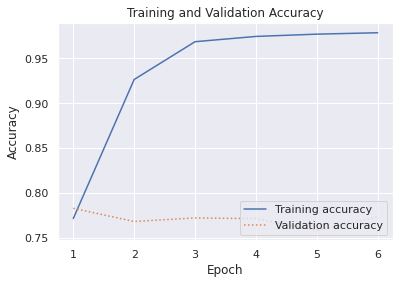

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Observation: 

** Simple neural network with glove vector found accuracy of 78.273

# Convolutional neural network:

In [ ]:
#https://www.atmosera.com/blog/text-classification-with-neural-networks/
model1 = Sequential()
model1.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_mat]))
model1.add(Conv1D(32, 7, activation='relu'))
model1.add(MaxPooling1D())
model1.add(Conv1D(32, 7, activation='relu'))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(1, activation='sigmoid'))
model1.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
hist = model1.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.4865 - accuracy: 0.7724
Epoch 1: val_accuracy improved from 0.78273 to 0.80183, saving model to best_model.h5

Epoch: 1 - Training Precision: 0.893789 - Training Recall: 0.861015 - Training F1: 0.869389
Epoch: 1 - Validation Precision: 0.816328 - Validation Recall: 0.782674 - Validation F1: 0.78903
160/160 [==============================] - 14s 83ms/step - loss: 0.4865 - accuracy: 0.7724 - val_loss: 0.4621 - val_accuracy: 0.8018
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.2962 - accuracy: 0.8814
Epoch 2: val_accuracy did not improve from 0.80183

Epoch: 2 - Training Precision: 0.954027 - Training Recall: 0.941894 - Training F1: 0.946548
Epoch: 2 - Validation Precision: 0.806875 - Validation Recall: 0.78539 - Validation F1: 0.790607
160/160 [==============================] - 12s 77ms/step - loss: 0.2962 - accuracy: 0.8814 - val_loss: 0.4830 - val_accuracy: 0.8006
Epoch 3/10
160/160 [=====

[]

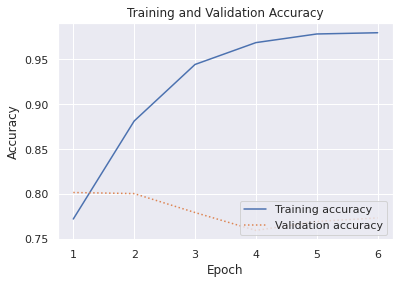

In [ ]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Observation:

** Cov1D with glove vector found the accuracy of 80.183

# LSTM model

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_mat]))
lstm_model.add(LSTM(units=100,kernel_initializer='glorot_uniform',recurrent_dropout=0.5,return_sequences=True))
lstm_model.add(GlobalMaxPool1D())
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(10, activation="relu"))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1, activation = "sigmoid"))


In [ ]:

lstm_model.compile(optimizer = Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 27, 300)           4641600   
                                                                 
 lstm (LSTM)                 (None, 27, 100)           160400    
                                                                 
 global_max_pooling1d_2 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization (BatchN  (None, 100)              400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_4 (Dense)             (None, 10)               

In [ ]:
hist = lstm_model.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.5954 - accuracy: 0.7139
Epoch 1: val_accuracy did not improve from 0.80183

Epoch: 1 - Training Precision: 0.832907 - Training Recall: 0.829936 - Training F1: 0.831245
Epoch: 1 - Validation Precision: 0.781951 - Validation Recall: 0.780007 - Validation F1: 0.780876
160/160 [==============================] - 29s 161ms/step - loss: 0.5954 - accuracy: 0.7139 - val_loss: 0.6022 - val_accuracy: 0.7859
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.4355 - accuracy: 0.8076
Epoch 2: val_accuracy did not improve from 0.80183

Epoch: 2 - Training Precision: 0.873346 - Training Recall: 0.821259 - Training F1: 0.830553
Epoch: 2 - Validation Precision: 0.814148 - Validation Recall: 0.769624 - Validation F1: 0.776025
160/160 [==============================] - 25s 156ms/step - loss: 0.4355 - accuracy: 0.8076 - val_loss: 0.5135 - val_accuracy: 0.7923
Epoch 3/10
160/160 [==============================] - ET

[]

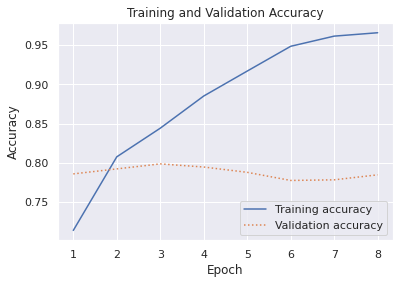

In [ ]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

#observation:

* Single layer LSTM model with embedding found the accuracy as 79.86

#Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:

lstm_model1 = Sequential()
lstm_model1.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_mat]))
lstm_model1.add(Bidirectional(LSTM(units=100,kernel_initializer='glorot_uniform',recurrent_dropout=0.5,return_sequences=True)))
lstm_model1.add(GlobalMaxPool1D())
lstm_model1.add(BatchNormalization())
lstm_model1.add(Dropout(0.5))
lstm_model1.add(Dense(10, activation="relu"))
lstm_model1.add(Dropout(0.25))
lstm_model1.add(Dense(1, activation = "sigmoid"))

In [ ]:
lstm_model1.compile(optimizer = Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 27, 300)           4641600   
                                                                 
 bidirectional (Bidirectiona  (None, 27, 200)          320800    
 l)                                                              
                                                                 
 global_max_pooling1d_3 (Glo  (None, 200)              0         
 balMaxPooling1D)                                                
                                                                 
 batch_normalization_1 (Batc  (None, 200)              800       
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                      

In [ ]:
hist = lstm_model1.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.5833 - accuracy: 0.7261
Epoch 1: val_accuracy did not improve from 0.80183

Epoch: 1 - Training Precision: 0.838993 - Training Recall: 0.715581 - Training F1: 0.713774
Epoch: 1 - Validation Precision: 0.803103 - Validation Recall: 0.687439 - Validation F1: 0.680737
160/160 [==============================] - 50s 278ms/step - loss: 0.5833 - accuracy: 0.7261 - val_loss: 0.5976 - val_accuracy: 0.7278
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.4309 - accuracy: 0.8082
Epoch 2: val_accuracy did not improve from 0.80183

Epoch: 2 - Training Precision: 0.888938 - Training Recall: 0.850295 - Training F1: 0.859237
Epoch: 2 - Validation Precision: 0.810151 - Validation Recall: 0.775722 - Validation F1: 0.781886
160/160 [==============================] - 42s 261ms/step - loss: 0.4309 - accuracy: 0.8082 - val_loss: 0.4778 - val_accuracy: 0.7955
Epoch 3/10
160/160 [==============================] - ET

#observation:

* Single layer Bidirectional LSTM model with embedding found the accuracy as 79.55

#lets try word embedding from pretrained embeddings

In [ ]:
#https://www.kaggle.com/code/christofhenkel/how-to-preprocessing-when-using-embeddings/notebook

def build_vocab(sentences, verbose =  True):
    """
    :param sentences: list of list of words
    :return: dictionary of words and their count
    """
    vocab = {}
    for sentence in tqdm(sentences, disable = (not verbose)):
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

In [ ]:
sentences = df_train["text"].apply(lambda x: x.split()).values
vocab = build_vocab(sentences)
print({k: vocab[k] for k in list(vocab)[:5]})

100%|██████████| 7613/7613 [00:00<00:00, 178071.44it/s]

{'Our': 25, 'Deeds': 1, 'are': 345, 'the': 2575, 'Reason': 5}


In [ ]:
!gdown --id 1YUM5bWSYGOJbQtTth5c1gKwapkOSdna0

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1YUM5bWSYGOJbQtTth5c1gKwapkOSdna0
To: /content/Pickled glove.840b.300d.zip
100% 2.51G/2.51G [00:28<00:00, 88.6MB/s]


In [ ]:
!unzip "/content/Pickled glove.840b.300d.zip"

Archive:  /content/Pickled glove.840b.300d.zip
  inflating: glove.840B.300d.pkl     


In [ ]:
%%time

glove_embeddings = np.load('glove.840B.300d.pkl',allow_pickle=True)


CPU times: user 7.05 s, sys: 3.38 s, total: 10.4 s
Wall time: 10.8 s


In [ ]:
import operator

In [ ]:
def check_embeddings_coverage(X, embeddings):
    
    vocab = build_vocab(X)    
    
    covered = {}
    oov = {}    
    n_covered = 0
    n_oov = 0
    
    for word in vocab:
        try:
            covered[word] = embeddings[word]
            n_covered += vocab[word]
        except:
            oov[word] = vocab[word]
            n_oov += vocab[word]
            
    vocab_coverage = len(covered) / len(vocab)
    text_coverage = (n_covered / (n_covered + n_oov))
    
    sorted_oov = sorted(oov.items(), key=operator.itemgetter(1))[::-1]
    return sorted_oov, vocab_coverage, text_coverage


In [ ]:
train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage = check_embeddings_coverage(X_train["clean_text"], glove_embeddings)
test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage = check_embeddings_coverage(X_test["clean_text"], glove_embeddings)
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_glove_vocab_coverage, train_glove_text_coverage))
print('GloVe Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_glove_vocab_coverage, test_glove_text_coverage))

100%|██████████| 2513/2513 [00:00<00:00, 97236.01it/s]

GloVe Embeddings cover 97.30% of vocabulary and 86.57% of text in Training Set
GloVe Embeddings cover 97.30% of vocabulary and 86.56% of text in Test Set


In [ ]:
with open('glove.840B.300d.pkl', 'rb') as f:
    glove = pickle.load(f)
    
# define an embedding matrix
glove_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))

# get embeddings from GloVe and list out of vocabulary words
unknown_words = []    
for word, i in tokenizer.word_index.items():
    try:
        glove_matrix[i] = glove[word]
    except KeyError:
        unknown_words.append(word)
        
embedding_matrix = np.concatenate([glove_matrix], axis=-1)

In [ ]:
print("No of missing words:",len(unknown_words))

No of missing words: 3602


In [ ]:
unknown_wordsframe=pd.DataFrame(unknown_words)

In [ ]:
unknown_wordsframe.value_counts().to_csv("unknown words_glove.csv")

In [ ]:
import gc

In [ ]:
del glove_embeddings,train_glove_oov, train_glove_vocab_coverage, train_glove_text_coverage,test_glove_oov, test_glove_vocab_coverage, test_glove_text_coverage
gc.collect()

30716

# lets try for fasttext embedding

In [ ]:
!gdown --id 1JHicpxjC66wseC5FkOCkk9sbh-NwMWEs

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1JHicpxjC66wseC5FkOCkk9sbh-NwMWEs
To: /content/Pickled Crawl -300D-2M.zip
100% 1.82G/1.82G [00:16<00:00, 110MB/s] 


In [ ]:
!unzip "/content/Pickled Crawl -300D-2M.zip"

Archive:  /content/Pickled Crawl -300D-2M.zip
  inflating: crawl-300d-2M.pkl       


In [ ]:
%%time

fasttext_embeddings = np.load('crawl-300d-2M.pkl',allow_pickle=True)


CPU times: user 5 s, sys: 2.5 s, total: 7.5 s
Wall time: 7.61 s


In [ ]:
with open('crawl-300d-2M.pkl', 'rb') as f:
    glove = pickle.load(f)
    
# define an embedding matrix
glove_matrix = np.zeros((len(tokenizer.word_index) + 1, 300))

# get embeddings from GloVe and list out of vocabulary words
unknown_words = []    
for word, i in tokenizer.word_index.items():
    try:
        glove_matrix[i] = glove[word]
    except KeyError:
        unknown_words.append(word)
        
embedding_matrix = np.concatenate([glove_matrix], axis=-1)

In [ ]:
print("No of missing words:",len(unknown_words))

No of missing words: 3876


In [ ]:
unknown_wordsframe=pd.DataFrame(unknown_words)

In [ ]:
unknown_wordsframe.value_counts().to_csv("unknown words_fasttext.csv")

In [ ]:
train_fasttext_oov, train_fasttext_vocab_coverage, train_fasttext_text_coverage = check_embeddings_coverage(X_train["clean_text"], fasttext_embeddings)
test_fasttext_oov, test_fasttext_vocab_coverage, test_fasttext_text_coverage = check_embeddings_coverage(X_test["clean_text"], fasttext_embeddings)
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Training Set'.format(train_fasttext_vocab_coverage, train_fasttext_text_coverage))
print('Fasttext Embeddings cover {:.2%} of vocabulary and {:.2%} of text in Test Set'.format(test_fasttext_vocab_coverage, test_fasttext_text_coverage))

100%|██████████| 2513/2513 [00:00<00:00, 91601.29it/s]

Fasttext Embeddings cover 97.30% of vocabulary and 86.57% of text in Training Set
Fasttext Embeddings cover 97.30% of vocabulary and 86.56% of text in Test Set


Observation: 
* Both glove and fasttext embedding having more or over same missing values

In [ ]:
!gdown --id 1Lgne8ANV3Ql3ZgmeHnY3AjyAAYOp7STB

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Lgne8ANV3Ql3ZgmeHnY3AjyAAYOp7STB
To: /content/glove.twitter.27B.200d.pkl.zip
100% 923M/923M [00:11<00:00, 77.0MB/s]


In [ ]:
!unzip "/content/glove.twitter.27B.200d.pkl.zip"

Archive:  /content/glove.twitter.27B.200d.pkl.zip
  inflating: glove.twitter.27B.200d.pkl  


In [ ]:
%%time

Twitter_embeddings = np.load('glove.twitter.27B.200d.pkl',allow_pickle=True)

CPU times: user 2.98 s, sys: 1.73 s, total: 4.7 s
Wall time: 5.1 s


In [ ]:
with open('glove.twitter.27B.200d.pkl', 'rb') as f:
    glove = pickle.load(f)
    
# define an embedding matrix
glove_matrix = np.zeros((len(tokenizer.word_index) + 1, 200))

# get embeddings from GloVe and list out of vocabulary words
unknown_words = []    
for word, i in tokenizer.word_index.items():
    try:
        glove_matrix[i] = glove[word]
    except KeyError:
        unknown_words.append(word)
        
embedding_matrix = np.concatenate([glove_matrix], axis=-1)

In [ ]:
print("No of missing words:",len(unknown_words))

No of missing words: 4066


In [ ]:
unknown_wordsframe=pd.DataFrame(unknown_words)

In [ ]:
unknown_wordsframe.value_counts().to_csv("unknown words_twittertweets.csv")

In [ ]:
!gdown --id 1PiePliTAtktXtIjBCAvWsyAn124_NqU3

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1PiePliTAtktXtIjBCAvWsyAn124_NqU3
To: /content/glove.twitter.27B.100d.pkl.zip
100% 482M/482M [00:45<00:00, 10.5MB/s]


In [ ]:
!unzip "/content/glove.twitter.27B.100d.pkl.zip"

Archive:  /content/glove.twitter.27B.100d.pkl.zip
  inflating: glove.twitter.27B.100d.pkl  


In [ ]:
with open('glove.twitter.27B.100d.pkl', 'rb') as f:
    glove = pickle.load(f)
    
# define an embedding matrix
glove_matrix = np.zeros((len(tokenizer.word_index) + 1, 100))

# get embeddings from GloVe and list out of vocabulary words
unknown_words = []    
for word, i in tokenizer.word_index.items():
    try:
        glove_matrix[i] = glove[word]
    except KeyError:
        unknown_words.append(word)
        
embedding_matrix = np.concatenate([glove_matrix], axis=-1)

In [ ]:
print("No of missing words:",len(unknown_words))

No of missing words: 4243


#observation: 

** Overall fasttext word embedding  is best suited for model fitting

** Try to do preprocessing on the missing words and improve the model

#Lets try Conv1D and lSTM and Bidirectional LSTM with glove word embedding 

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_matrix]))
model.add(Conv1D(32, 7, activation='relu'))
model.add(MaxPooling1D())
model.add(Conv1D(32, 7, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=["accuracy"])

In [ ]:
hist = model.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.4983 - accuracy: 0.7592
Epoch 1: val_accuracy improved from -inf to 0.80382, saving model to best_model.h5

Epoch: 1 - Training Precision: 0.908711 - Training Recall: 0.892484 - Training F1: 0.898022
Epoch: 1 - Validation Precision: 0.806634 - Validation Recall: 0.791033 - Validation F1: 0.795462
160/160 [==============================] - 11s 15ms/step - loss: 0.4983 - accuracy: 0.7592 - val_loss: 0.4354 - val_accuracy: 0.8038
Epoch 2/10
152/160 [===========================>..] - ETA: 0s - loss: 0.2786 - accuracy: 0.8945
Epoch 2: val_accuracy improved from 0.80382 to 0.80899, saving model to best_model.h5

Epoch: 2 - Training Precision: 0.963052 - Training Recall: 0.957572 - Training F1: 0.959968
Epoch: 2 - Validation Precision: 0.808475 - Validation Recall: 0.799446 - Validation F1: 0.802578
160/160 [==============================] - 2s 13ms/step - loss: 0.2785 - accuracy: 0.8947 - val_loss: 0.4700 - val_accuracy:

[]

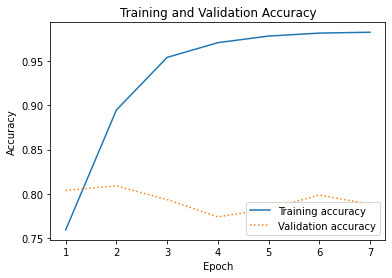

In [ ]:
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Observation:

** Conv1D with glove word embedding found accuracy of 81.894 with F1 of 0.8127
Kaggle output as below

#LSTM Model

In [ ]:
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_matrix]))
lstm_model.add(LSTM(units=100,kernel_initializer='glorot_uniform',recurrent_dropout=0.5,return_sequences=True))
lstm_model.add(BatchNormalization())
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(300, activation="relu"))
lstm_model.add(Dropout(0.25))
lstm_model.add(Dense(1, activation = "sigmoid"))


In [ ]:
lstm_model.compile(optimizer = Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 27, 300)           4672800   
                                                                 
 lstm (LSTM)                 (None, 27, 100)           160400    
                                                                 
 batch_normalization (BatchN  (None, 27, 100)          400       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 27, 100)           0         
                                                                 
 dense_1 (Dense)             (None, 27, 300)           30300     
                                                                 
 dropout_1 (Dropout)         (None, 27, 300)           0         
                                                      

In [ ]:
callbacks1 =[checkpoint,early_stop]

In [ ]:
hist = lstm_model.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks1)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.5136 - accuracy: 0.7611
Epoch 1: val_accuracy did not improve from 0.80899
160/160 [==============================] - 21s 105ms/step - loss: 0.5136 - accuracy: 0.7611 - val_loss: 0.5376 - val_accuracy: 0.7882
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.3662 - accuracy: 0.8487
Epoch 2: val_accuracy did not improve from 0.80899
160/160 [==============================] - 19s 116ms/step - loss: 0.3662 - accuracy: 0.8487 - val_loss: 0.4638 - val_accuracy: 0.7920
Epoch 3/10
160/160 [==============================] - ETA: 0s - loss: 0.2433 - accuracy: 0.9055
Epoch 3: val_accuracy did not improve from 0.80899
160/160 [==============================] - 16s 103ms/step - loss: 0.2433 - accuracy: 0.9055 - val_loss: 0.5642 - val_accuracy: 0.7717
Epoch 4/10
160/160 [==============================] - ETA: 0s - loss: 0.1667 - accuracy: 0.9372
Epoch 4: val_accuracy did not improve from 0.80899
160/160 [=

Observation:

** LSTM with glove word embedding found accuracy of 79.61
kaggle screenshots below

#Bidirectional LSTM

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
lstm_model1 = Sequential()
lstm_model1.add(Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_matrix]))
lstm_model1.add(Bidirectional(LSTM(units=100,kernel_initializer='glorot_uniform',recurrent_dropout=0.5,return_sequences=True)))
lstm_model1.add(BatchNormalization())
lstm_model1.add(Dropout(0.5))
lstm_model1.add(Dense(128, activation="relu"))
lstm_model1.add(Dropout(0.25))
lstm_model1.add(Dense(1, activation = "sigmoid"))

In [ ]:
lstm_model1.compile(optimizer = Adam(learning_rate=0.001), loss = "binary_crossentropy", metrics = ["accuracy"])
lstm_model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 27, 300)           4672800   
                                                                 
 bidirectional_1 (Bidirectio  (None, 27, 200)          320800    
 nal)                                                            
                                                                 
 batch_normalization_2 (Batc  (None, 27, 200)          800       
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 27, 200)           0         
                                                                 
 dense_5 (Dense)             (None, 27, 128)           25728     
                                                                 
 dropout_5 (Dropout)         (None, 27, 128)          

In [ ]:
hist = lstm_model1.fit(X_train_pad_tokens,y_train, epochs=10,validation_data=(X_test_pad_tokens,y_test),batch_size=32,callbacks=callbacks1)

Epoch 1/10
160/160 [==============================] - ETA: 0s - loss: 0.5186 - accuracy: 0.7651
Epoch 1: val_accuracy improved from 0.80948 to 0.81063, saving model to best_model.h5
160/160 [==============================] - 58s 219ms/step - loss: 0.5186 - accuracy: 0.7651 - val_loss: 0.5031 - val_accuracy: 0.8106
Epoch 2/10
160/160 [==============================] - ETA: 0s - loss: 0.3286 - accuracy: 0.8652
Epoch 2: val_accuracy did not improve from 0.81063
160/160 [==============================] - 37s 231ms/step - loss: 0.3286 - accuracy: 0.8652 - val_loss: 0.4487 - val_accuracy: 0.7955
Epoch 3/10
160/160 [==============================] - ETA: 0s - loss: 0.1978 - accuracy: 0.9247
Epoch 3: val_accuracy did not improve from 0.81063
160/160 [==============================] - 44s 273ms/step - loss: 0.1978 - accuracy: 0.9247 - val_loss: 0.5140 - val_accuracy: 0.7893
Epoch 4/10
160/160 [==============================] - ETA: 0s - loss: 0.1281 - accuracy: 0.9554
Epoch 4: val_accuracy did 

Observation:

** Bidirectional LSTM with fast text embedding found accuracy of 81.17 twitter tweets with 100d

#lets try Text metafeatures along with text features

In [ ]:
from keras.models import Model

In [ ]:
# First create text data with LSTM & Embedding
text= Input(shape=(27,),name='text_input') # Fromm glove vectors we have taken 300 dimension
X_text=Embedding(input_dim=max_vocabulary+1,output_dim=300,input_length=maxlen,weights=[embedding_mat],trainable=True)(text)
lstm_text=LSTM(units=100,kernel_initializer='glorot_uniform',recurrent_dropout=0.5,return_sequences=True)(X_text) # Recurrent dropout was taken 0.5
flatten_1=Flatten()(lstm_text)


# Lets do for numerical features
numeric_features=Input(shape=(6,),name="numerical features")
numeric_dense=Dense(300,activation="relu",kernel_initializer = tf.keras.initializers.he_normal())(numeric_features)

X_concat = concatenate([flatten_1,numeric_dense])

# Lets create model
model=Dense(300,activation="relu",kernel_initializer = tf.keras.initializers.he_normal())(X_concat)

# Dropout layer
model = Dropout(0.5)(model)

# Dense layer
model = Dense(100,activation="relu",kernel_initializer=tf.keras.initializers.glorot_normal())(model)

#  Dropout layer
model = Dropout(0.5)(model)

# Dense layer
model = Dense(100,activation="relu",kernel_initializer=tf.keras.initializers.glorot_normal())(model)

#Output layer
output = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.glorot_normal(),name='output')(model)

model=Model(inputs=[text ,numeric_features ],outputs=[output])

print(model.summary())



Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text_input (InputLayer)        [(None, 27)]         0           []                               
                                                                                                  
 embedding_18 (Embedding)       (None, 27, 300)      4641600     ['text_input[0][0]']             
                                                                                                  
 lstm_10 (LSTM)                 (None, 27, 100)      160400      ['embedding_18[0][0]']           
                                                                                                  
 numerical features (InputLayer  [(None, 6)]         0           []                               
 )                                                                                          

In [ ]:
# In input order need to assign the features
train_data=[X_train_pad_tokens,X_train_numeric_features]

test_data =[X_test_pad_tokens,X_test_numeric_features]

In [ ]:
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=["accuracy"])
## Training 

model.fit(train_data,y_train,epochs=20,verbose=2,validation_data=(test_data,y_test),batch_size =32,callbacks=callbacks)

# BERT Model

In [ ]:
import tensorflow_hub as hub
from tensorflow.keras.models import Model

In [ ]:
## Loading the Pretrained Model from tensorflow HUB
tf.keras.backend.clear_session()

max_seq_length = 27

input_word_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_word_ids")


input_mask = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="input_mask")

segment_ids = tf.keras.layers.Input(shape=(max_seq_length,), dtype=tf.int32, name="segment_ids")

#bert layer 
bert_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/1", trainable=False)
pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])

#Bert model
#We are using only pooled output not sequence out. 
#If you want to know about those, please read https://www.kaggle.com/questions-and-answers/86510
bert_model = Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=pooled_output)

In [ ]:
bert_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_word_ids (InputLayer)    [(None, 27)]         0           []                               
                                                                                                  
 input_mask (InputLayer)        [(None, 27)]         0           []                               
                                                                                                  
 segment_ids (InputLayer)       [(None, 27)]         0           []                               
                                                                                                  
 keras_layer (KerasLayer)       [(None, 768),        109482241   ['input_word_ids[0][0]',         
                                 (None, 27, 768)]                 'input_mask[0][0]',         

#Tokenization

In [ ]:
vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()

In [ ]:
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 35.2 MB/s eta 0:00:00


In [ ]:
!gdown --id 17Afug8QaE_iLaN_cQBQvDmeuCrMYZItu

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=17Afug8QaE_iLaN_cQBQvDmeuCrMYZItu
To: /content/tokenization.py
100% 17.3k/17.3k [00:00<00:00, 18.3MB/s]


In [ ]:
 #!pip install bert-tensorflow==1.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tokenization

In [ ]:
tokenizer=tokenization.FullTokenizer(vocab_file,do_lower_case )

In [ ]:
def bert_tokenizer(text):
  tokens=tokenizer.tokenize(text)
  # After tokenized the given text , We will get tokens for each text.
  # maximum number of tokens is 25(We already given this to BERT layer above) so shape is (None, 25) 
  if len(tokens) > max_seq_length-2:
    tokens=tokens[0:max_seq_length-2]
  # lets  add '[CLS]' at start of the Tokens and '[SEP]' at the end of the tokens.
  tokens= ['[CLS]',*tokens,'[SEP]']
  # lets do masking and padding
  mask=[1]*len(tokens) # First make mask as 1 as equal to length of tokens 
  
  if len(tokens) < 27:
      mask =mask+([0]*(max_seq_length-len(tokens))) # To fill remaining values to zero upto max_length
      tokens = tokens+(['[PAD]']*(max_seq_length-len(tokens))) # Padding
  # Create a segment input for train and test. We are using only one sentence so all zeros.
  segment=[0]*len(tokens)
  indexed_tokens = np.array(tokenizer.convert_tokens_to_ids(tokens))
  return indexed_tokens,mask,segment

In [ ]:
#initialization with zeroes for shape of requirements
X_train_tokens = np.zeros(shape=(len(X_train),max_seq_length))
X_train_mask = np.zeros(shape=(len(X_train),max_seq_length))
X_train_segment = np.zeros(shape=(len(X_train),max_seq_length))
X_test_tokens =np.zeros(shape=(len(X_test),max_seq_length))
X_test_mask =np.zeros(shape=(len(X_test),max_seq_length))
X_test_segment =np.zeros(shape=(len(X_test),max_seq_length))

 # lets pass each text and get tokens,mask,segment
for idx,text in enumerate(X_train["clean_text"].values):
    X_train_tokens[idx],X_train_mask[idx],X_train_segment[idx]=bert_tokenizer(text)
for idx,text in enumerate(X_test["clean_text"].values):
    X_test_tokens[idx],X_test_mask[idx],X_test_segment[idx]=bert_tokenizer(text)

In [ ]:
X_test_tokens1 =np.zeros(shape=(len(x_test),max_seq_length))
X_test_mask1 =np.zeros(shape=(len(x_test),max_seq_length))
X_test_segment1 =np.zeros(shape=(len(x_test),max_seq_length))
for idx,text in enumerate(x_test[0].values):
    X_test_tokens1[idx],X_test_mask1[idx],X_test_segment1[idx]=bert_tokenizer(text)

In [ ]:
import pickle

In [ ]:
##save all your results to disk so that, no need to run all again. 
pickle.dump((X_train, X_train_tokens, X_train_mask, X_train_segment, y_train),open('train_data.pkl','wb'))
pickle.dump((X_test, X_test_tokens, X_test_mask, X_test_segment, y_test),open('test_data.pkl','wb'))

In [ ]:
#you can load from disk
X_train, X_train_tokens, X_train_mask, X_train_segment, y_train = pickle.load(open("train_data.pkl", 'rb')) 
X_test, X_test_tokens, X_test_mask, X_test_segment, y_test = pickle.load(open("test_data.pkl", 'rb')) 

In [ ]:
X_train_pooled_output=bert_model.predict([X_train_tokens,X_train_mask,X_train_segment])

160/160 [==============================] - 11s 58ms/step


In [ ]:
X_test_pooled_output=bert_model.predict([X_test_tokens,X_test_mask,X_test_segment])

79/79 [==============================] - 5s 59ms/step


In [ ]:
x_test_pooled_output1=bert_model.predict([X_test_tokens1,X_test_mask1,X_test_segment1])

102/102 [==============================] - 6s 59ms/step


In [ ]:
pickle.dump((X_train_pooled_output, X_test_pooled_output),open('final_output.pkl','wb'))

In [ ]:
X_train_pooled_output, X_test_pooled_output= pickle.load(open('final_output.pkl', 'rb'))

In [ ]:
from tensorflow.keras.initializers import he_normal
from tensorflow.keras.regularizers import l2

In [ ]:
input_layer=Input(shape=(X_train_pooled_output.shape[1],))
denselayer1 = Dense(units=512, activation="relu", kernel_initializer=he_normal,kernel_regularizer=l2(0.001))(input_layer)
denselayer2 = Dense(units=256, activation="relu", kernel_initializer=he_normal,kernel_regularizer=l2(0.001))(denselayer1)
denselayer3 = Dense(units=128, activation="relu", kernel_initializer=he_normal,kernel_regularizer=l2(0.001))(denselayer2)
output_layer = Dense(1, activation='sigmoid',kernel_regularizer=l2(0.001), name="Reviewclassifier")(denselayer3)
bertmodel = Model(inputs = [input_layer],outputs = [output_layer])
bertmodel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 768)]             0         
                                                                 
 dense (Dense)               (None, 512)               393728    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 Reviewclassifier (Dense)    (None, 1)                 129       
                                                                 
Total params: 558,081
Trainable params: 558,081
Non-trainable params: 0
_________________________________________________________________


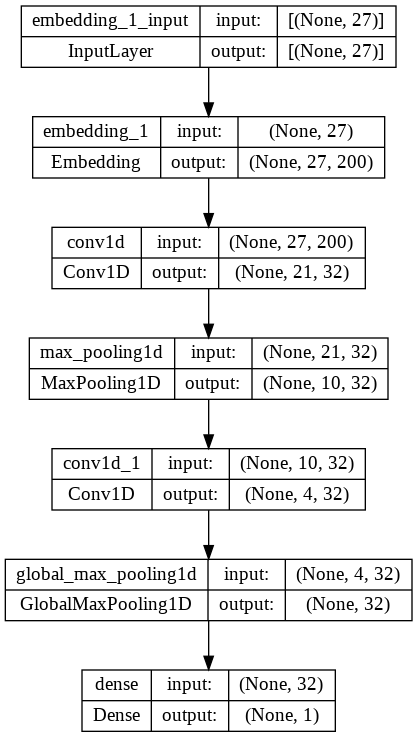

In [ ]:
tf.keras.utils.plot_model(model,to_file = 'model.png',show_shapes=True,show_layer_names=True)

In [ ]:
callbacks2 =[checkpoint]

In [ ]:
bertmodel.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])
## Training 

history=bertmodel.fit(X_train_pooled_output,y_train,epochs=60,verbose=2,validation_data=(X_test_pooled_output,y_test),batch_size =32,callbacks=callbacks2) 

Epoch 1/60

Epoch 1: val_accuracy did not improve from 0.81178
160/160 - 3s - loss: 1.5716 - accuracy: 0.6702 - val_loss: 1.1162 - val_accuracy: 0.7382 - 3s/epoch - 16ms/step
Epoch 2/60

Epoch 2: val_accuracy did not improve from 0.81178
160/160 - 2s - loss: 0.9917 - accuracy: 0.7288 - val_loss: 0.8524 - val_accuracy: 0.7656 - 2s/epoch - 10ms/step
Epoch 3/60

Epoch 3: val_accuracy did not improve from 0.81178
160/160 - 2s - loss: 0.8148 - accuracy: 0.7478 - val_loss: 0.7288 - val_accuracy: 0.7799 - 2s/epoch - 10ms/step
Epoch 4/60

Epoch 4: val_accuracy did not improve from 0.81178
160/160 - 2s - loss: 0.7246 - accuracy: 0.7563 - val_loss: 0.6892 - val_accuracy: 0.7533 - 2s/epoch - 10ms/step
Epoch 5/60

Epoch 5: val_accuracy did not improve from 0.81178
160/160 - 1s - loss: 0.6912 - accuracy: 0.7431 - val_loss: 0.6365 - val_accuracy: 0.7752 - 1s/epoch - 9ms/step
Epoch 6/60

Epoch 6: val_accuracy did not improve from 0.81178
160/160 - 2s - loss: 0.6432 - accuracy: 0.7608 - val_loss: 0.60

Observation:

** Bert model not performing as expected. Will try to fit after further preprocessing with accuracy as 0.7971

In [ ]:
from keras.models import load_model
model = load_model('best_model.h5')

In [ ]:
y_pred = model.predict(x_test_pad_tokens)

102/102 [==============================] - 2s 17ms/step


In [ ]:
sample_submission = pd.read_csv("/content/data/sample_submission.csv")

In [ ]:
y_final=[]
for i in range(0,3263):
   y_final.append(y_pred[i][0])


In [ ]:
sample_submission['target'] = np.round(y_final).astype(int)
sample_submission.to_csv('model_submission_BILSTM_crawlembedding_bp.csv', index=False)